In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# In a notebook environment, display the plots inline
%matplotlib inline

In [2]:
daily_data = pd.read_csv('day.csv')
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum']

daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])
daily_data.drop(drop_list, inplace = True, axis = 1)

In [3]:
daily_data.describe()

,weekday,temp,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.997264,0.495385,0.190486,848.176471,3656.172367,4504.348837
std,2.004787,0.183051,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.059130,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,0.498333,0.180975,713.000000,3662.000000,4548.000000
75%,5.000000,0.655417,0.233214,1096.000000,4776.500000,5956.000000
max,6.000000,0.861667,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
daily_data.head(n=10)

,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600
5,2011-01-06,4,0.204348,0.089565,88,1518,1606
6,2011-01-07,5,0.196522,0.168726,148,1362,1510
7,2011-01-08,6,0.165000,0.266804,68,891,959
8,2011-01-09,0,0.138333,0.361950,54,768,822
9,2011-01-10,1,0.150833,0.223267,41,1280,1321


## Quantitative Data

### Scatter Plot

Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

In [5]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.70)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

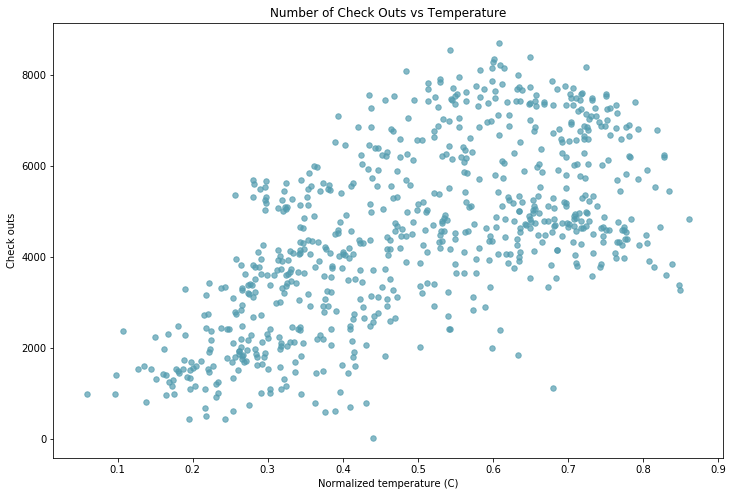

In [6]:
scatterplot(x_data = daily_data['temp']
            , y_data = daily_data['cnt']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

### Line plot

We will use regression to fit a linear model to data.

In [7]:
from sklearn.linear_model import LinearRegression

def lineplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    X = x_data.values.reshape(-1, 1)
    y = y_data.values.reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X, y)
    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(X, reg.predict(X), lw = 2, color = '#539caf', alpha = 1)
    ax.scatter(X, y, s = 30, color = '#7663b0', alpha = 0.70)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


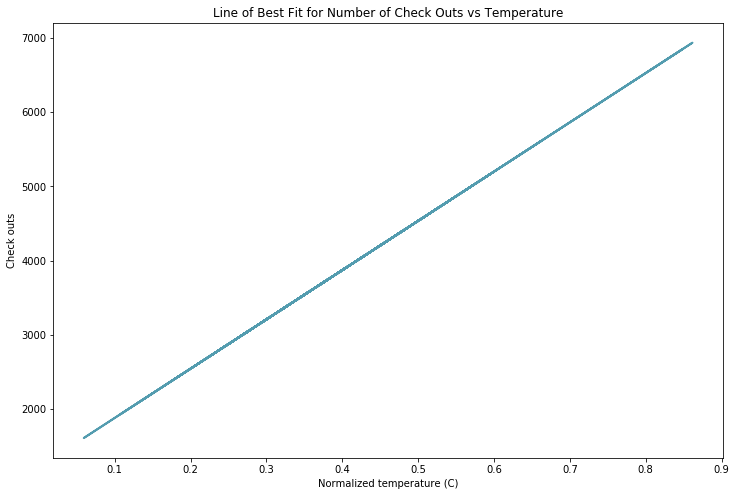

In [8]:
X = daily_data['temp'].values.reshape(-1, 1)
y = daily_data['cnt'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

lineplot(x_data = X
         , y_data = reg.predict(X)
         , x_label = 'Normalized temperature (C)'
         , y_label = 'Check outs'
         , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

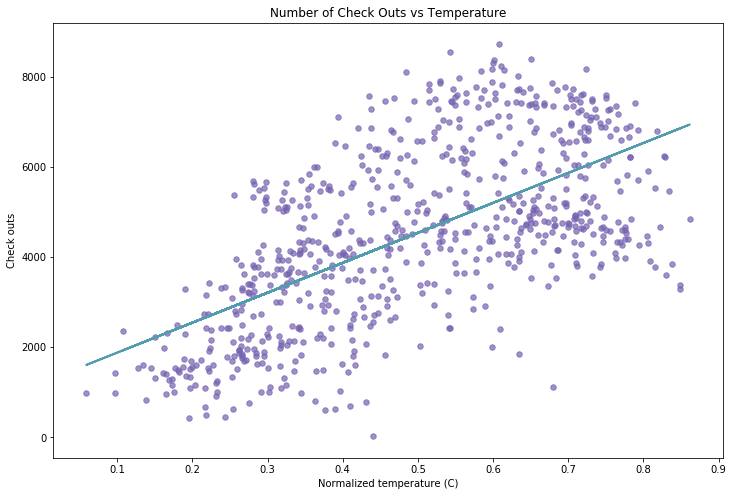

In [9]:
linear_regression_plot(x_data = daily_data['temp']
            , y_data = daily_data['cnt']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

### Line Plot With Two Y Axes

Compare two quantitative variables against each other over a third variable, but the variables have very different scales

In [10]:
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):

    # Create the first plot object and draw the line
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)

    # Create the second plot object, telling matplotlib that the two
    # objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    
    # Show right frame line
    ax2.spines['right'].set_visible(True)

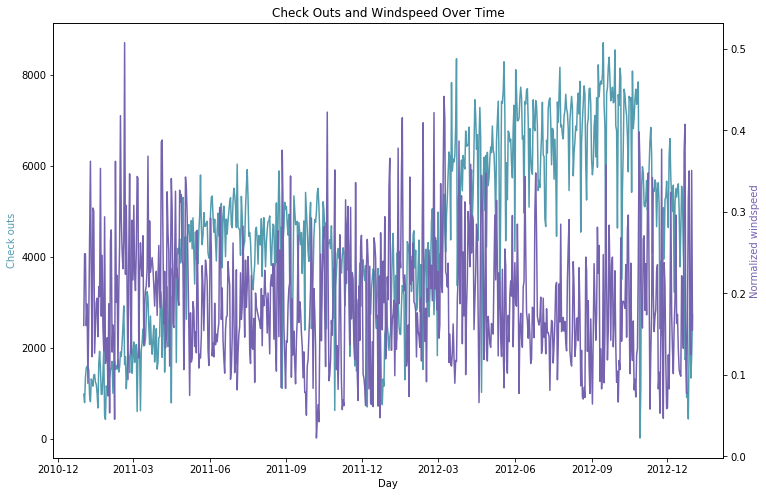

In [11]:
lineplot2y(x_data = daily_data['dteday']
           , x_label = 'Day'
           , y1_data = daily_data['cnt']
           , y1_color = '#539caf'
           , y1_label = 'Check outs'
           , y2_data = daily_data['windspeed']
           , y2_color = '#7663b0'
           , y2_label = 'Normalized windspeed'
           , title = 'Check Outs and Windspeed Over Time')

### Histogram

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.

In [12]:
def histogram(data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist(data, color = '#539caf', ec='grey', alpha=0.75)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

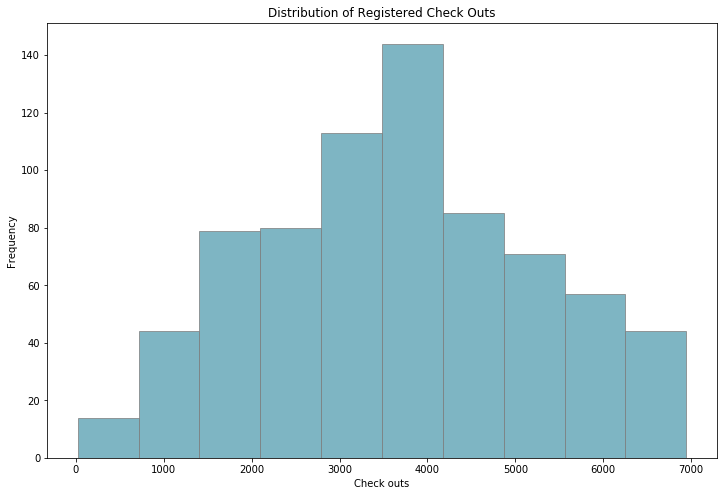

In [13]:
histogram(data = daily_data['registered']
           , x_label = 'Check outs'
           , y_label = 'Frequency'
           , title = 'Distribution of Registered Check Outs')

### Overlaid Histogram

In [14]:
def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are
    # fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name, ec='grey')
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name, ec='grey')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')


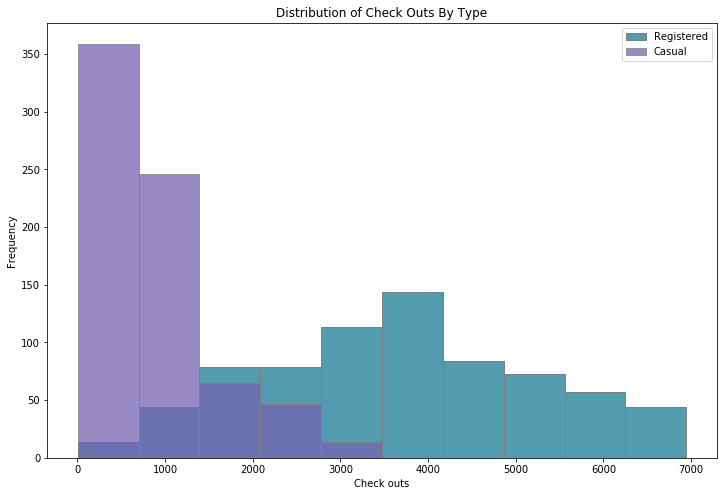

In [15]:
overlaid_histogram(data1 = daily_data['registered']
                   , data1_name = 'Registered'
                   , data1_color = '#539caf'
                   , data2 = daily_data['casual']
                   , data2_name = 'Casual'
                   , data2_color = '#7663b0'
                   , x_label = 'Check outs'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Check Outs By Type')

### Density Plot

A Density Plot visualises the distribution of data over a continuous interval or time period. The peaks of a Density Plot help display where values are concentrated over the interval.

[<matplotlib.text.Text at 0x110ecd390>, <matplotlib.text.Text at 0x110e529e8>]

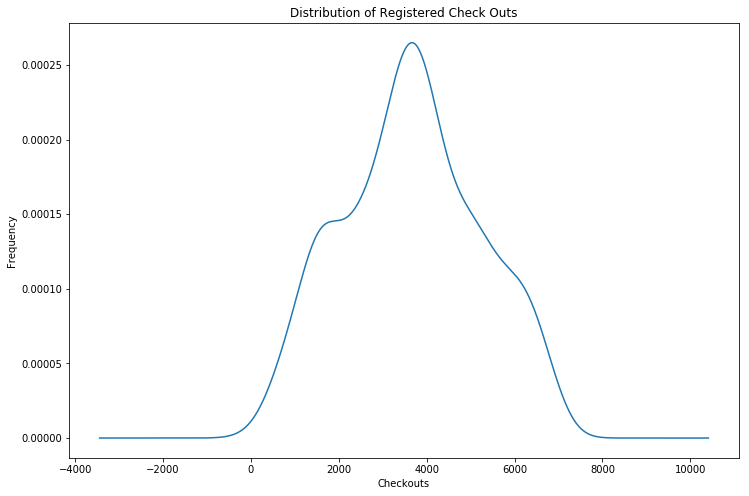

In [16]:
ax = daily_data['registered'].plot(kind='density', figsize=(12, 8), title='Distribution of Registered Check Outs')
ax.set(ylabel='Frequency', xlabel='Checkouts')

## Comparing Qualitative / Categorical data

### Bar Plot

Bar graphs / charts provide a visual presentation of categorical data. Categorical data is a grouping of data into discrete groups.

In [17]:
def barplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

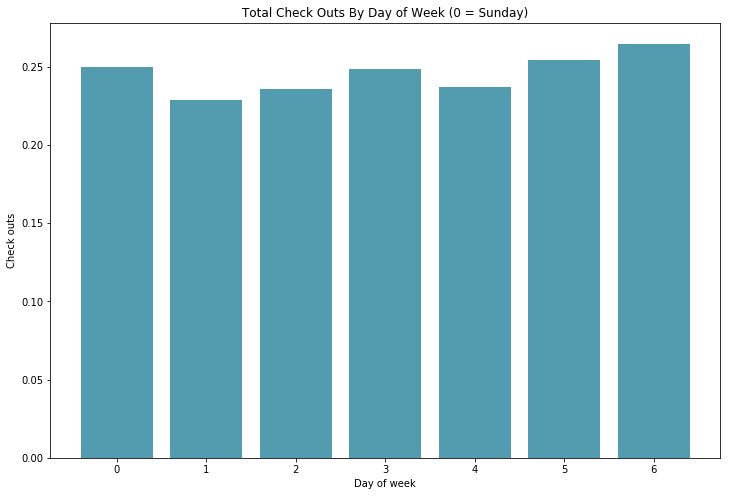

In [18]:
barplot(x_data = daily_data['weekday']
        , y_data = (daily_data['cnt'] / daily_data['cnt'].sum()) * 100
        , x_label = 'Day of week'
        , y_label = 'Check outs'
        , title = 'Total Check Outs By Day of Week (0 = Sunday)')

### Stacked Bar Chart

Stacked bar plots are best used to compare proportions between categories (proportion of registered vs. casual checkouts on Monday for instance)

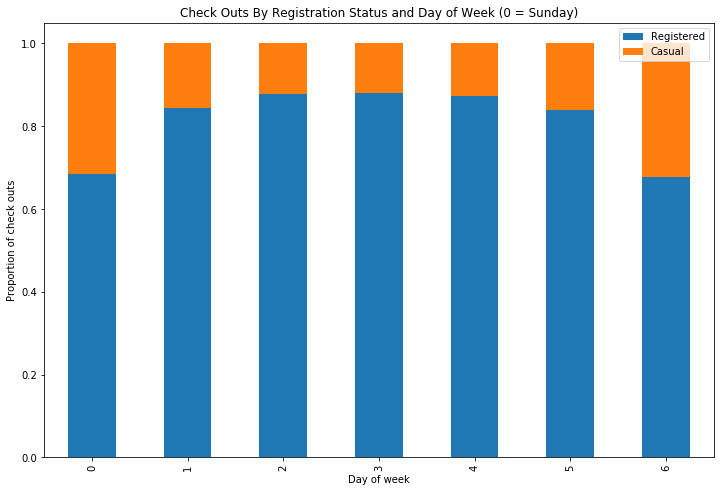

In [19]:
mean_by_reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').mean()

mean_by_reg_co_day['total'] = mean_by_reg_co_day['registered'] + mean_by_reg_co_day['casual']
mean_by_reg_co_day['Registered'] = mean_by_reg_co_day['registered'] / mean_by_reg_co_day['total']
mean_by_reg_co_day['Casual'] = mean_by_reg_co_day['casual'] / mean_by_reg_co_day['total']

df = mean_by_reg_co_day[['Registered', 'Casual']]
ax = df.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set(ylabel='Proportion of check outs', 
       xlabel='Day of week', 
       title="Check Outs By Registration Status and Day of Week (0 = Sunday)")

### Grouped Bar Plot

For situations where you need to compare the actual values between categories

In [20]:
reg_co_day = daily_data[['weekday', 'registered', 'casual']].groupby('weekday').count()

df = mean_by_reg_co_day[['registered', 'casual']]

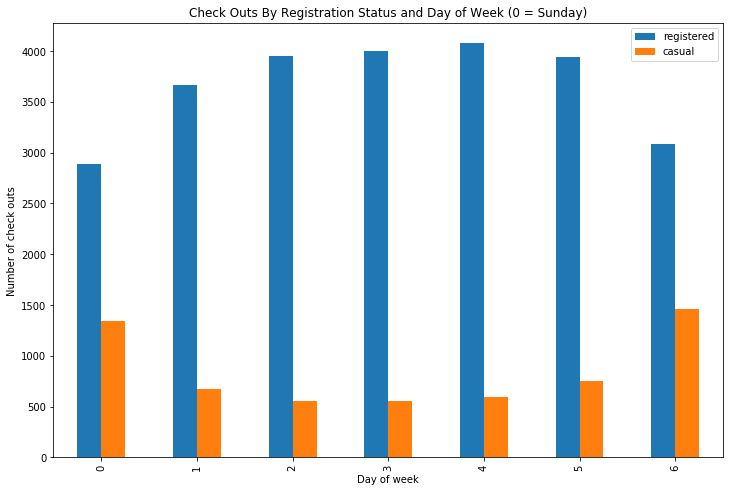

In [21]:
ax = df.plot(kind='bar', figsize=(12, 8))

ax.set(ylabel='Number of check outs', 
       xlabel='Day of week', 
       title="Check Outs By Registration Status and Day of Week (0 = Sunday)")